In [1]:
#Moving Average Convergence/Divergence crossover (MACD) Based Trading Algorithm
#MACD = 12 period EMA - 26 period EMA
#9 Day EMA of MACD -> Signal Line
#Buy when MACD crosses over Signal Line
#Sell when MACD crosses below Signal Line

In [15]:
# Libraries import
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')

In [16]:
#Collecting Tesla stock data for last 5 years from YahooFinance
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,268.914795
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,269.600067
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.264771


In [17]:
# Reshape the df
df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

KeyError: 'Date'

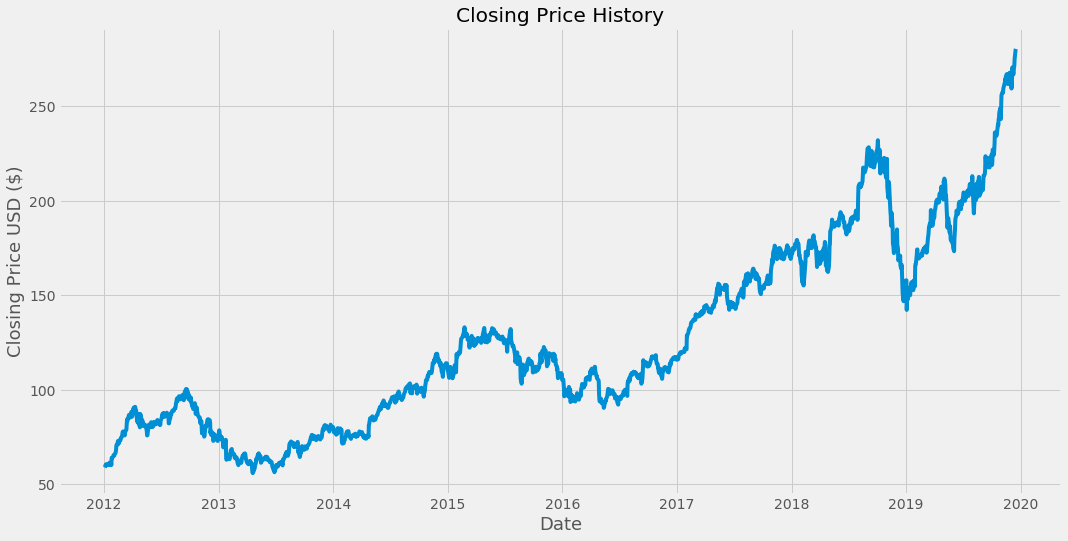

In [21]:
#visualising the stock price
plt.figure(figsize=(16,8))                      # size of image
plt.title('Closing Price History')              # title on image
plt.plot(df['Close'])                           # plot the close points
plt.xlabel('Date', fontsize=18)                 # on x show the date
plt.ylabel('Closing Price USD ($)', fontsize=18) # on y show USD price
plt.show()

In [22]:
#Calculating 12 period EMA (Exponential Moving Average)
ema12 = df['Adj Close'].ewm(span=12,adjust=False).mean()
#Calculating 26 period EMA (Exponential Moving Average)
ema26 = df['Adj Close'].ewm(span=26,adjust=False).mean()
#Calculating the MACD line
MACD = ema12 - ema26
#Calculating the signal line
signal = MACD.ewm(span=9,adjust=False).mean()

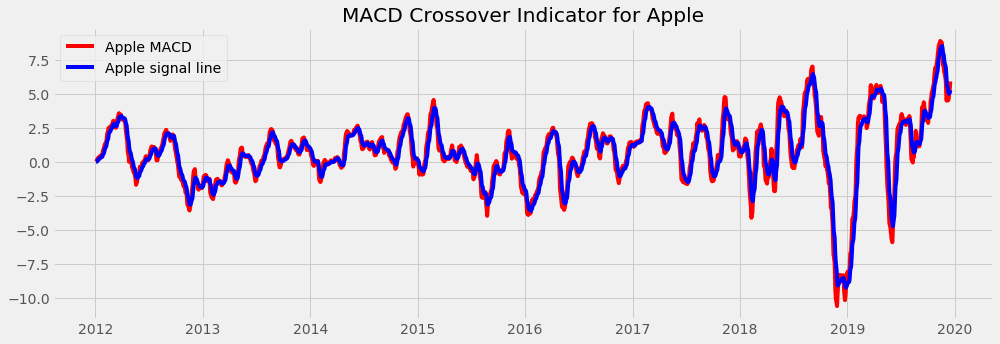

In [24]:
#plotting the MACD graph
plt.figure(figsize=(15,5))
plt.plot(df.index, MACD, label = 'Apple MACD', color = 'red')
plt.plot(df.index, signal, label = 'Apple signal line', color = 'blue')
plt.title('MACD Crossover Indicator for Apple')
plt.legend()
plt.show()

In [25]:
df['MACD'] = MACD
df['sigLine'] = signal

In [26]:
#Defining buy/sell signals
def trade_signal(signal):
    buy = []
    sell = []
    flag = -1
    for i in range(0,len(signal)):
        if(signal['MACD'][i]>signal['sigLine'][i]):
            sell.append(np.nan)
            if(flag!=1):
                buy.append(signal['Adj Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
        elif(signal['MACD'][i]<signal['sigLine'][i]):
            buy.append(np.nan)
            if(flag!=0):
                sell.append(signal['Adj Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return buy,sell

In [27]:
trades = trade_signal(df)

In [28]:
df['Buy_At'] = trades[0]
df['Sell_At'] = trades[1]

In [29]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,MACD,sigLine,Buy_At,Sell_At
Date,,,,,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709,0.000000,0.000000,NaN,NaN
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536,0.021764,0.004353,51.038536,NaN
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175,0.083769,0.020236,NaN,NaN
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630,0.174428,0.051075,NaN,NaN
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932,0.236872,0.088234,NaN,NaN


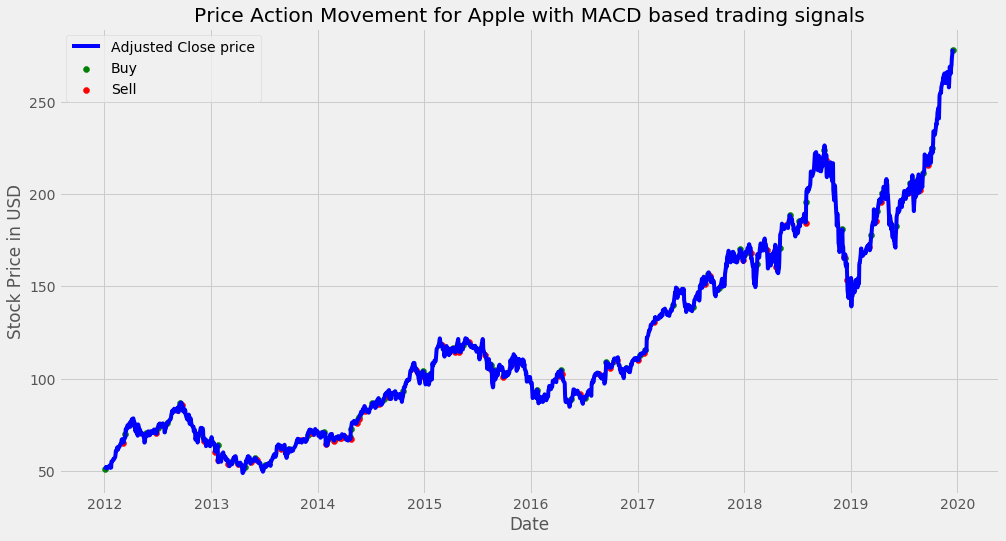

In [36]:
#plotting buy/sell signals on graph
plt.figure(figsize=(15,8))
plt.scatter(df.index, df['Buy_At'], color='green', label='Buy')
plt.scatter(df.index, df['Sell_At'], color='red', label='Sell')
plt.plot(df['Adj Close'], color = 'blue', label = 'Adjusted Close price')
plt.title('Price Action Movement for Apple with MACD based trading signals')
plt.xlabel('Date')
plt.ylabel('Stock Price in USD')
plt.legend()
plt.show()
